### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

In [78]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [79]:
#f(x) che rimane dopo aver separato p(x)
def function(x):
    return x**3

In [80]:
sigma = np.linspace(1, 1000)  #test per differenti valori di sigma
N = int(1e5)

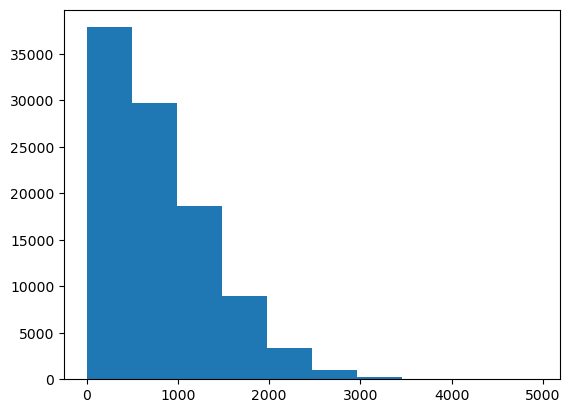

In [81]:
# =============================================================================
# UTILIZZO UNA DISTRIBUZIONE HALF-GAUSSIANA DA 0 A + INFINITO:
#   IN QUESTO CASO, NON DEVO CORREGGERE I VALORI DI X PERCHÉ LA PDF É DEFINITA
#   SOLAMENTE NELL'INTERVALLO POSITIVO 0, +INFINITO
# =============================================================================
rapporto = []
for s in sigma:
    gauss = scipy.stats.halfnorm(loc = 0 , scale=s)
    draws = gauss.rvs(N)    
    #plt.hist(draws)
    integral = np.mean(function(draws))*np.sqrt(2*np.pi)*s/2
    
    rapporto.append(integral/(2*s**4)) #verifica che rapporto sia = 1
plt.hist(draws); #esempio di un draw di samples half-gaussian

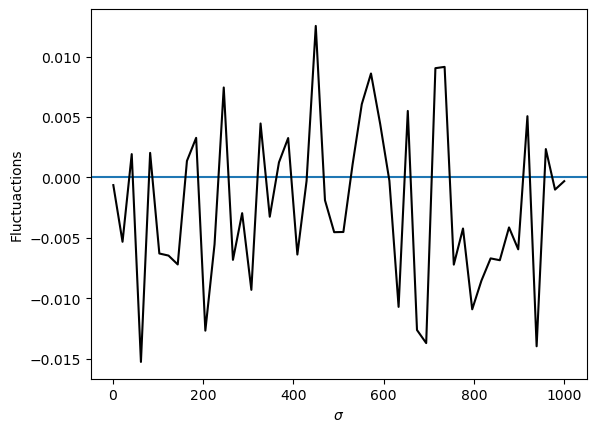

In [68]:
#fluctuactions with respect to a 1:1 ratio
rapporto = np.array(rapporto)
plt.axhline(0)
plt.plot(sigma, 1-rapporto, color = 'black')
plt.xlabel(r'$\sigma$')
plt.ylabel('Fluctuactions')
plt.show()

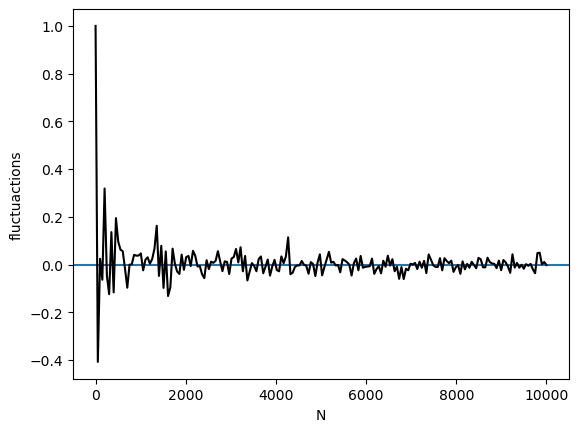

In [72]:
#analysis of the impact of N on the fluctuactions
sigma = 0.5
Nvals = np.linspace(1, 10000, 200, dtype = int)

rapporto = []
for n in Nvals:
    gauss = scipy.stats.halfnorm(loc = 0 , scale=sigma)
    draws = gauss.rvs(n)    
    #plt.hist(draws)
    integral = np.mean(function(draws))*np.sqrt(2*np.pi)*sigma/2
    
    rapporto.append(integral/(2*sigma**4)) #verifica che rapporto sia = 1

#plot fluctuactions with respect to 1:1 ratio
rapporto = np.array(rapporto)
plt.axhline(0)
plt.plot(Nvals, 1-rapporto, color = 'black')
plt.xlabel('N')
plt.ylabel('fluctuactions')
plt.show()

In [73]:
#for chosen N, studying how the error varies: should follow gaussian distribution: sigma_mean = sigma/sqrt(N)
rapporto = []
for n in range(10000):
    gauss = scipy.stats.halfnorm(loc = 0 , scale=sigma)
    draws = gauss.rvs(N)    
    #plt.hist(draws)
    integral = np.mean(function(draws))*np.sqrt(2*np.pi)*sigma/2
    
    rapporto.append(integral/(2*sigma**4))

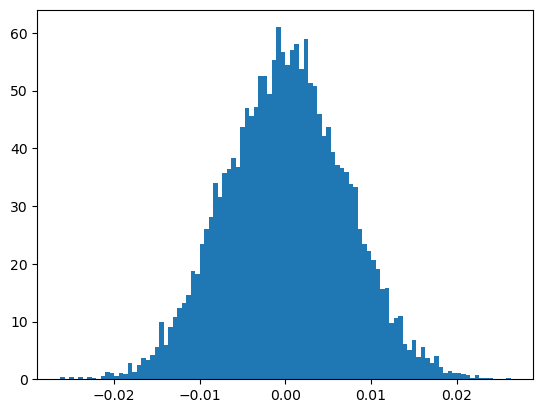

In [74]:
#histogram of the fluctuations
rapporto = np.array(rapporto)
plt.hist(1-rapporto, bins = 100, density = True);

In [75]:
mean = np.average(1-rapporto)
std = np.std(1-rapporto, ddof=1)

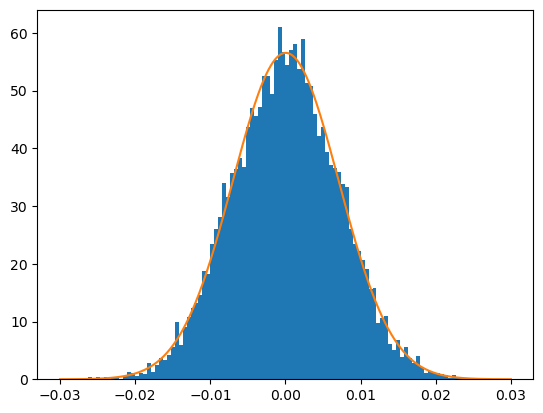

In [76]:
#check fluctuactions follow a gaussian distribution
plt.hist(1-rapporto,density=True, bins=100);
gauss = scipy.stats.norm(loc=mean,scale=std)
x = np.linspace(-0.03,0.03,1000)
plt.plot(x,gauss.pdf(x));